In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:/Spring 2025/PDS/Assignment3/Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:

df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.


In [9]:
np.random.seed(32)


# Sample 25 observations
sample = df.sample(25)

In [10]:
sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()

In [12]:
population_mean_glucose = df["Glucose"].mean()
population_max_glucose = df["Glucose"].max()

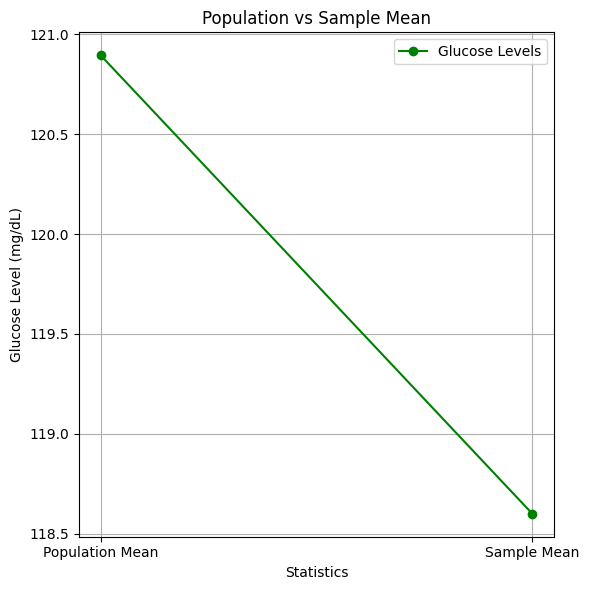

In [13]:
categories = ['Population Mean', 'Sample Mean']
values = [population_mean_glucose,sample_mean_glucose]
plt.figure(figsize=(6, 6))
plt.plot(categories, values, marker='o', linestyle='-', color='green', label='Glucose Levels')
plt.xlabel('Statistics')
plt.ylabel('Glucose Level (mg/dL)')
plt.title('Population vs Sample Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

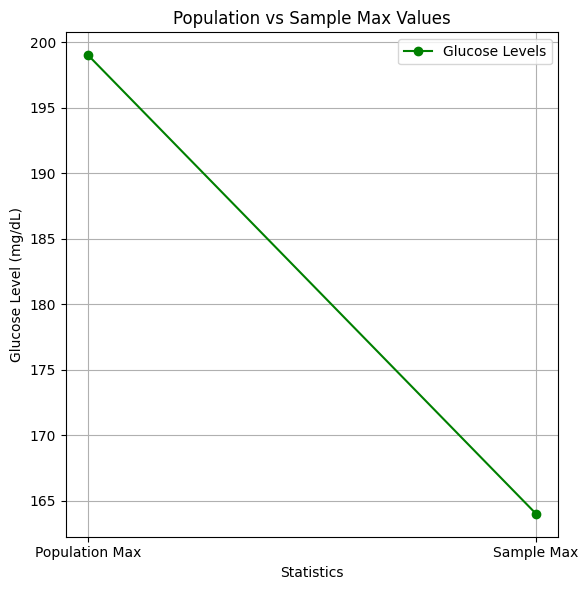

In [14]:
categories = ['Population Max', 'Sample Max']
values = [population_max_glucose,sample_max_glucose]
plt.figure(figsize=(6, 6))
plt.plot(categories, values, marker='o', linestyle='-', color='green', label='Glucose Levels')
plt.xlabel('Statistics')
plt.ylabel('Glucose Level (mg/dL)')
plt.title('Population vs Sample Max Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. 

In [16]:
sample_98th_bmi = np.percentile(sample["BMI"], 98)
population_98th_bmi = np.percentile(df["BMI"], 98)

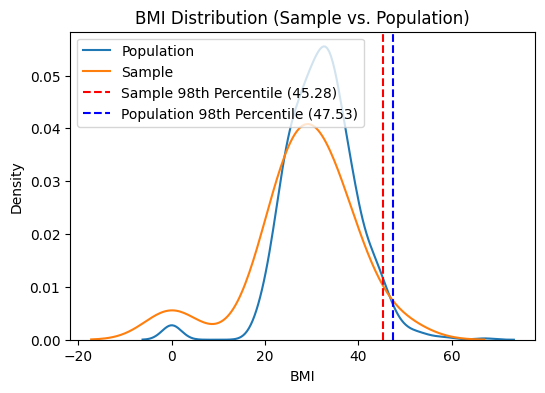

In [20]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df["BMI"], label="Population")
sns.kdeplot(sample["BMI"], label="Sample")
plt.axvline(sample_98th_bmi, color="red", linestyle="--", label=f"Sample 98th Percentile ({sample_98th_bmi:.2f})")
plt.axvline(population_98th_bmi, color="blue", linestyle="--", label=f"Population 98th Percentile ({population_98th_bmi:.2f})")
plt.title("BMI Distribution (Sample vs. Population)")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. 

In [21]:
bootstrap_samples = 500
sample_size = 150

In [22]:
bootstrap_mean_samples = np.zeros(bootstrap_samples)
bootstrap_std_samples = np.zeros(bootstrap_samples)
bootstrap_95th_percentiles = np.zeros(bootstrap_samples)

In [24]:
population_mean = df["BloodPressure"].mean()
population_std_dev = df["BloodPressure"].std()
population_95th_percentile = np.percentile(df["BloodPressure"], 95)


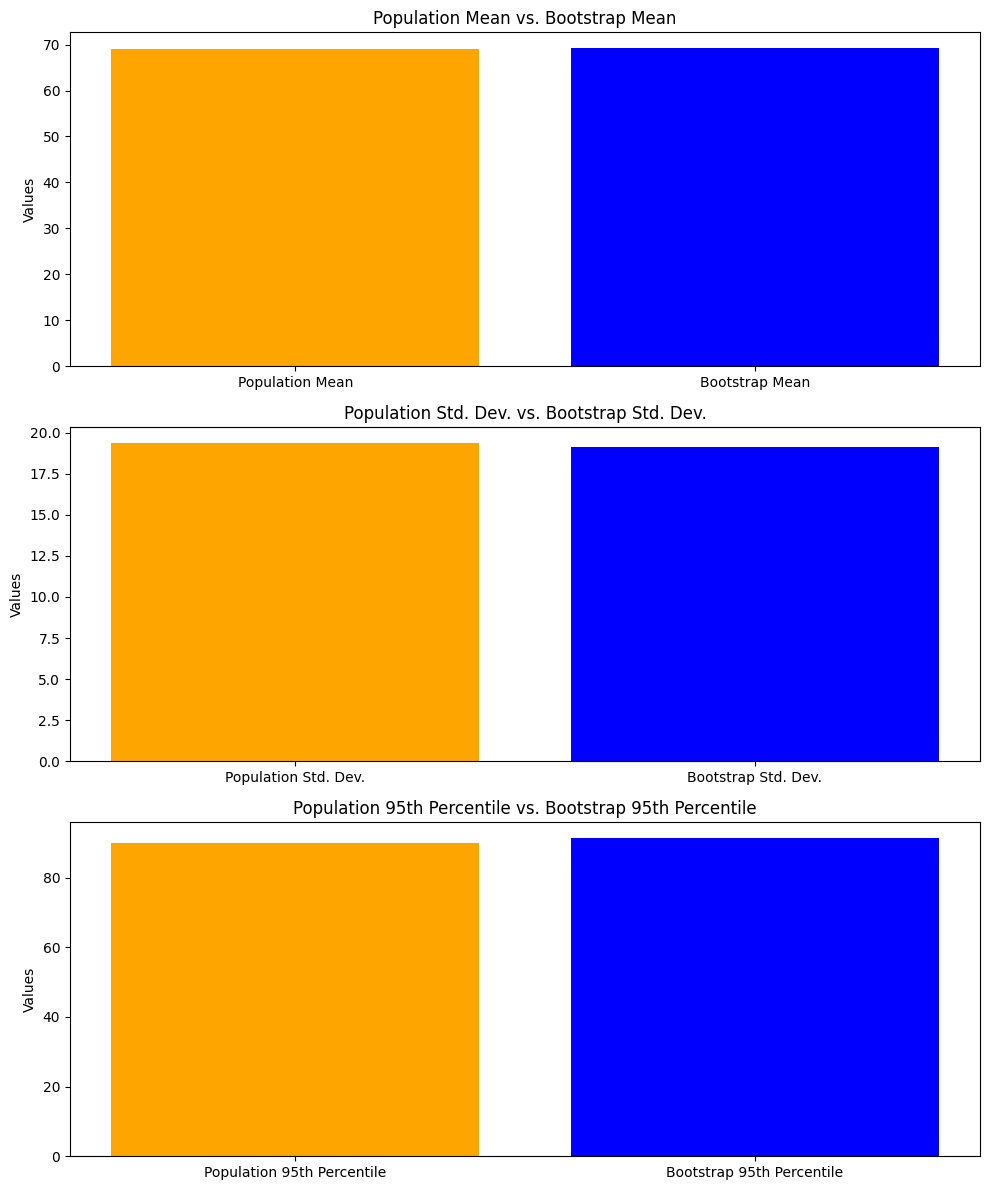

Population Mean Blood Pressure: 69.11
Population Standard Deviation Blood Pressure: 19.36
Population 95th Percentile Blood Pressure: 90.00

Bootstrap Mean Blood Pressure (average of 500 means): 69.20
Bootstrap Standard Deviation Blood Pressure (std of 500 means): 19.10
Bootstrap 95th Percentile Blood Pressure (average of 500 percentiles): 91.29


In [26]:
for i in range(bootstrap_samples):
    bootstrap_sample = df["BloodPressure"].sample(sample_size, replace=True)
    bootstrap_mean_samples[i] = bootstrap_sample.mean()
    bootstrap_std_samples[i] = bootstrap_sample.std()
    bootstrap_95th_percentiles[i] = np.percentile(bootstrap_sample, 95)

bmean = np.mean(bootstrap_mean_samples)
bsd = np.mean(bootstrap_std_samples)
bp95 = np.mean(bootstrap_95th_percentiles)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].bar(["Population Mean", "Bootstrap Mean"], [population_mean, bmean], color=["orange", "blue"])
axs[0].set_ylabel("Values")
axs[0].set_title("Population Mean vs. Bootstrap Mean")

axs[1].bar(["Population Std. Dev.", "Bootstrap Std. Dev."], [population_std_dev, bsd], color=["orange", "blue"])
axs[1].set_ylabel("Values")
axs[1].set_title("Population Std. Dev. vs. Bootstrap Std. Dev.")

axs[2].bar(["Population 95th Percentile", "Bootstrap 95th Percentile"], [population_95th_percentile, bp95], color=["orange", "blue"])
axs[2].set_ylabel("Values")
axs[2].set_title("Population 95th Percentile vs. Bootstrap 95th Percentile")

plt.tight_layout()
plt.show()

# Report findings (consider adding these comments to your code)
print(f"Population Mean Blood Pressure: {population_mean:.2f}")
print(f"Population Standard Deviation Blood Pressure: {population_std_dev:.2f}")
print(f"Population 95th Percentile Blood Pressure: {population_95th_percentile:.2f}")
print(f"\nBootstrap Mean Blood Pressure (average of 500 means): {bmean:.2f}")
print(f"Bootstrap Standard Deviation Blood Pressure (std of 500 means): {bsd:.2f}")
print(f"Bootstrap 95th Percentile Blood Pressure (average of 500 percentiles): {bp95:.2f}")